### Check http://pixelogik.github.io/NearPy/ for more information

In [1]:
%matplotlib inline

In [2]:
import numpy
import time

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjectionsBias

#from nearpy.hashes import RandomBinaryProjections
#from nearpy.hashes import RandomDiscretizedProjections

from nearpy.filters import NearestFilter, UniqueFilter
from matplotlib import pyplot as plt
from nearpy.distances import EuclideanDistance

In [3]:
# Dimension of our vector space
dimension = 2

# Generate num_of_vectors random vectors
num_of_vectors = 1000
data=numpy.empty([dimension,num_of_vectors])
for index in range(num_of_vectors):
    data[:,index] = numpy.random.randn(dimension)

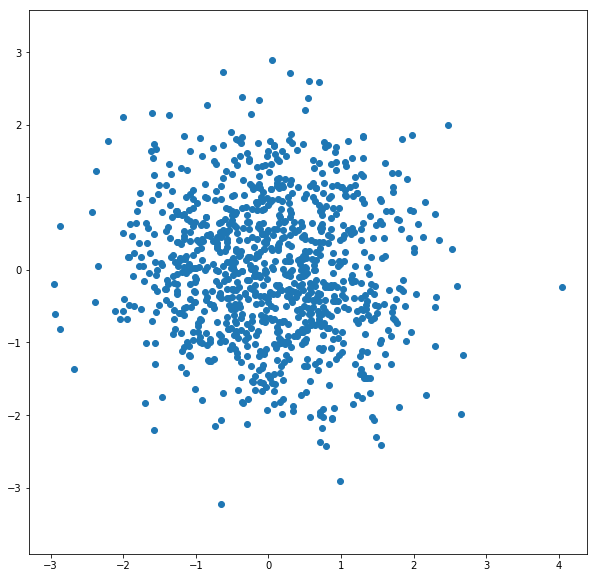

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])


In [5]:
# Create a random binary hash with projection_count bits

projection_count=25 # Each dimension dim vector will be hashed into projection_count bits
bias_bound = 3
rbp = RandomBinaryProjectionsBias('rbp', projection_count,bias_bound)

# Create engine with pipeline configuration
engine = Engine(dimension, lshashes=[rbp],distance=EuclideanDistance())


*** engine init done ***


In [6]:
for iter in range(20): 
    #print(data[:,iter])
    print(rbp.hash_vector(data[:,iter]))


['0100000011100111100110001']
['1010111100011000011001110']
['1011100011001110000111101']
['0111000011100111100110101']
['0111100011100110100111101']
['0101000011100111100110101']
['0100011100110101111000011']
['0100001100110101101110001']
['0101000011100111100110001']
['1100011100011001011000011']
['1011111100011000011001110']
['0101000011100111100110101']
['1111100011100110100111101']
['0100001100110101101110001']
['1011100011001110000111111']
['1011110011011010010111110']
['1011100011101110100111101']
['1010111100011000011001110']
['1111100011100110100111101']
['1010111100011000011001110']


In [7]:
# We are looking for the ten closest neighbours
# nearest = NearestFilter(10)

# We want unique candidates
# unique = UniqueFilter()


In [8]:
#help(RandomDiscretizedProjections)
#help(RandomBinaryProjections)
#help(Engine)

In [9]:
t0 = time.time()

# Index num_of_vectors random vectors (set their data to a unique string)
for index in range(num_of_vectors):
    v = data[:,index]
    engine.store_vector(v, 'data_%d' % index)                    
    
t1 = time.time()
print('Creating the data structure took %f seconds' % (t1-t0))

Creating the data structure took 0.018453 seconds


In [10]:
# Create random query vector
#query = numpy.random.randn(dimension)
query = [-1,-1]
print(query)

[-1, -1]


In [11]:
engine.candidate_count(query)

17

In [12]:
t0 = time.time()
# Get nearest neighbours
N = engine.neighbours(query,distance=EuclideanDistance(),vector_filters=[NearestFilter(200)])
#N = engine.neighbours(query,distance=EuclideanDistance())
t1 = time.time()
print('Query took %f seconds' % (t1-t0))

len(N)

Query took 0.000868 seconds


17

In [13]:
N

[(array([-1.03879807, -0.96160623]), 'data_514', 0.05458362340789016),
 (array([-0.95760675, -0.96387371]), 'data_381', 0.05569826054024063),
 (array([-0.94422166, -0.99641673]), 'data_236', 0.055893322122366564),
 (array([-0.91319432, -1.01355778]), 'data_560', 0.08785806765177405),
 (array([-0.94917167, -0.91884944]), 'data_230', 0.09575454165529164),
 (array([-1.09918543, -1.04800785]), 'data_798', 0.1101930290055484),
 (array([-0.85263303, -1.02883556]), 'data_2', 0.15016162808770636),
 (array([-0.86656534, -0.86969819]), 'data_336', 0.1865030035552972),
 (array([-0.80625639, -0.9905931 ]), 'data_367', 0.19397184076051124),
 (array([-1.07473412, -1.18330253]), 'data_948', 0.19795203160464844),
 (array([-1.09190028, -1.17581115]), 'data_454', 0.19838151051087843),
 (array([-0.80544594, -0.94990484]), 'data_24', 0.2008999927491008),
 (array([-1.20537248, -1.33509599]), 'data_65', 0.39302312923970206),
 (array([-0.70485492, -0.71550801]), 'data_199', 0.4099345186946),
 (array([-1.1411

In [14]:
# Real neighbours
print('\n *** Calculate Real neighbour distances ***')

dists=numpy.zeros(num_of_vectors)
t0 = time.time()
for iter in range(num_of_vectors):
    dists[iter] = EuclideanDistance().distance(data[:,iter], query)
dists = dists.reshape((-1,))
dists = sorted(dists)
t1 = time.time()
print('Query took %f seconds' % (t1-t0))

print('Exact distances:', dists[:10])

print('Max distance:', dists[-1])



 *** Calculate Real neighbour distances ***
Query took 0.014197 seconds
Exact distances: [0.05458362340789016, 0.05569826054024063, 0.055893322122366564, 0.08785806765177405, 0.09575454165529164, 0.1101930290055484, 0.126482663500459, 0.14239601198741492, 0.15016162808770636, 0.15340805753627984]
Max distance: 5.094094117768509


In [15]:
#help(engine.neighbours)

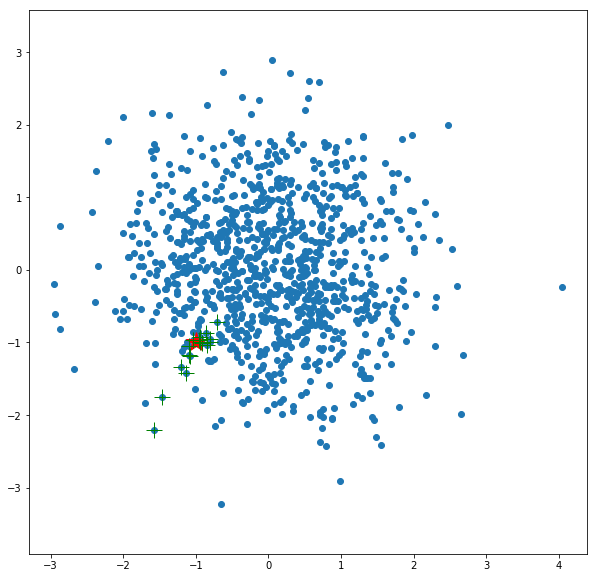

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])

plt.plot(query[0],query[1],'r*', markersize=20)
for iter in range(len(N)):
    #plt.plot(N[iter][0][0],N[iter][0][1],'g*', markersize=16)
    index=int(N[iter][1].split('_')[1])
    plt.plot(data[0,index],data[1,index],'g+', markersize=16)
